<a href="https://colab.research.google.com/github/juliosdutra/FundamentosComputacionais/blob/main/Usando_cstr_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<left><img src="https://github.com/juliosdutra/Controle_de_Processos_UFES/blob/main/imagens/cabe%C3%A7alho-geral.jpg?raw=true" width="700" height="175">
</left>


    


In [1]:
!wget -q https://raw.githubusercontent.com/juliosdutra/FundamentosComputacionais/refs/heads/main/Utilidades/cstr_series.py -O cstr_series.py


In [2]:
import cstr_series

# Exibir as funções carregadas
import inspect

for name, obj in inspect.getmembers(cstr_series, inspect.isfunction):
    print(name)

ajuda
dataclass
modelo_CSTR
serie_CSTR


**Aprenda a usar a função com uma ajuda**
(que pode ser programada por você para outros usuários)

In [8]:
from cstr_series import ajuda

ajuda()


    Exemplo de uso do módulo de simulação de CSTRs.

    >>> from cstr_series import CSTR_param, modelo_CSTR, serie_CSTR

    # Criar uma lista de 3 reatores com parâmetros diferentes
    >>> reatores = [
    ...     CSTR_param(F=50, V=100, k=0.5),
    ...     CSTR_param(F=50, V=100, k=0.8),
    ...     CSTR_param(F=50, V=100, k=1.2)
    ... ]

    # Concentração de entrada no primeiro reator
    >>> CA0 = 1.0

    # Simular série de reatores
    >>> concentracoes, conversoes = serie_CSTR(reatores, CA0)

    # Exibir resultados
    >>> for i, (CA, X) in enumerate(zip(concentracoes[1:], conversoes), start=1):
    ...     print(f"Reator {i}: C_A = {CA:.4f} mol/L | Conversão acumulada = {X:.2%}")
    


**Usando a função para o cálculo da concentrações e da conversão acumulada...**

In [12]:
from cstr_series import serie_CSTR, CSTR_param

N = 10 # Número de reatores idênticos em série
param = N*[CSTR_param(F=50, V=200, k=0.35)]  # usa os valores padrão
CA0 = 1.0
conc, conv = serie_CSTR(param, CA0)

for i in range(1, len(conc)):
    print(f"Reator {i}: C_A = {conc[i]:.4f} mol/L | Conversão acumulada = {conv[i-1]:.2%}")

Reator 1: C_A = 0.4167 mol/L | Conversão acumulada = 58.33%
Reator 2: C_A = 0.1736 mol/L | Conversão acumulada = 82.64%
Reator 3: C_A = 0.0723 mol/L | Conversão acumulada = 92.77%
Reator 4: C_A = 0.0301 mol/L | Conversão acumulada = 96.99%
Reator 5: C_A = 0.0126 mol/L | Conversão acumulada = 98.74%
Reator 6: C_A = 0.0052 mol/L | Conversão acumulada = 99.48%
Reator 7: C_A = 0.0022 mol/L | Conversão acumulada = 99.78%
Reator 8: C_A = 0.0009 mol/L | Conversão acumulada = 99.91%
Reator 9: C_A = 0.0004 mol/L | Conversão acumulada = 99.96%
Reator 10: C_A = 0.0002 mol/L | Conversão acumulada = 99.98%


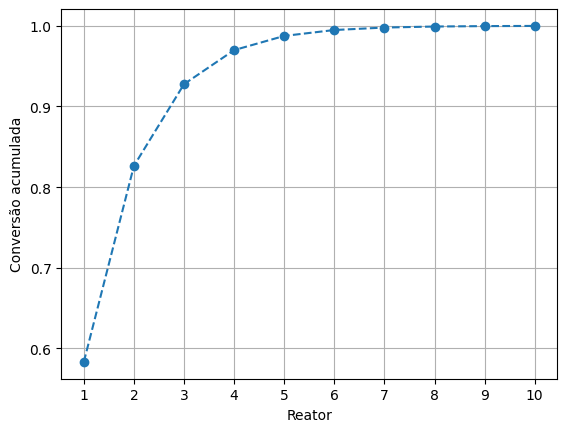

In [13]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
plt.plot(range(1,N+1), conv, 'o--')
plt.xlabel('Reator')
plt.ylabel('Conversão acumulada')
plt.grid()

# Força os ticks do eixo x a serem inteiros
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.show()


**Usando a função com condições distintas em cada reator...**

Reator 1: C_A = 0.5000 mol/L | Conversão acumulada = 50.00%
Reator 2: C_A = 0.1923 mol/L | Conversão acumulada = 80.77%
Reator 3: C_A = 0.0275 mol/L | Conversão acumulada = 97.25%
Reator 4: C_A = 0.0069 mol/L | Conversão acumulada = 99.31%


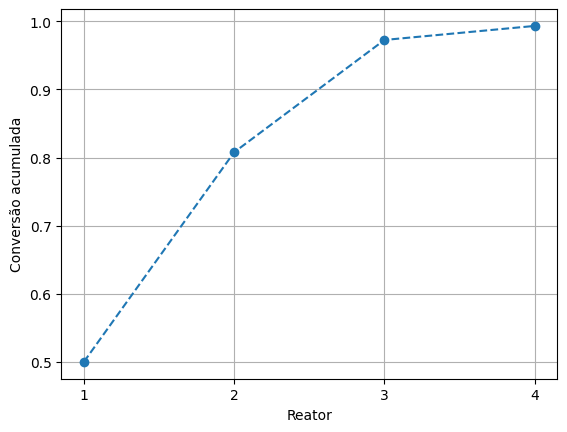

In [14]:
params = [
    CSTR_param(F=50, V=100, k=0.5),
    CSTR_param(F=50, V=100, k=0.8),
    CSTR_param(F=50, V=200, k=1.5),
    CSTR_param(F=50, V=100, k=1.5)
]

CA0 = 1.0
conc, conv = serie_CSTR(params, CA0)

for i in range(1, len(conc)):
    print(f"Reator {i}: C_A = {conc[i]:.4f} mol/L | Conversão acumulada = {conv[i-1]:.2%}")

plt.figure()
plt.plot([1, 2, 3, 4], conv, 'o--')
plt.xlabel('Reator')
plt.ylabel('Conversão acumulada')
plt.grid()

# Força os ticks do eixo x a serem inteiros
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.show()